In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#READ THE CSV FILE
df = pd.read_csv("WHO-COVID-19-global-data.csv")
df = pd.DataFrame(df)

In [3]:
df_countries = df.groupby(df["Country"])
#OMAN
df_oman = df_countries.get_group("Oman")
df_oman = df_oman.reset_index(drop = True)
df_oman = df_oman['Cumulative_cases']
df_oman = pd.DataFrame(df_oman)

#NORMALIZATION
pop_o = 5107000
df_oman["Cumulative_cases_norm"] = df_oman["Cumulative_cases"]/pop_o
oman = df_oman
i = 0
while i < 103:
    oman = oman.drop(oman.index[0])
    i = i + 1

oman = oman.reset_index(drop = True)
oman["Cumulative_cases_norm"] = oman["Cumulative_cases"]/pop_o
oman["log"] = np.log(oman["Cumulative_cases_norm"])

# OMAN (first wave)

**log P = c + rt -------------------1**

The First wave of Oman is 0-338 (in days). Each wave will have an exponential growth and logistic growth. The exponential growth is the high point of the wave where the cases are rising exponentially and rapidly. The logistic is the end part of the wave, where the cases are seemingly slowed down and it means the end of the first wave altogether. There may be multiple exponential and logistics growths within a wave.

Now from the graphs above, we know that

c = -8.63267

t = 338

log(P) = -3.533515 (from the log return graph at t = 338)

From 1,

r = (-3.533515 + 8.63267)/338

r = 0.0150862

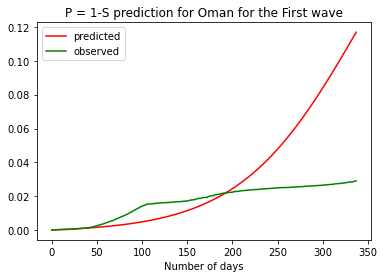

In [9]:
r = 0.0150862
from scipy.integrate import odeint

#Total population n
n = pop_o
#Initial number of infected and recovered individuals, i_0 and r_0
i_0 = oman["Cumulative_cases_norm"][0]
r_0 = 0
# beginning of the period s_0
s_0 = 1 - i_0 - r_0
# Assuming that people tend to recover within 10 days
b = 0.1
a = r + b
t = np.linspace(0, 338, 338)
# The SIR model differential equations.
def deriv(y, t, a, b):
    S, I, R = y
    dSdt = - a * S * I
    dIdt = a * (S * I) - (b * I)
    dRdt = b * I
    return dSdt, dIdt, dRdt

y0 = s_0, i_0, r_0
ret = odeint(deriv, y0, t, args=(a, b))
S, I, R = ret.T

s = pd.DataFrame()
s["s"] = S
s["pred"] = 1 - s["s"]
s["pred"].plot(c = 'red', label = 'predicted')
oman['Cumulative_cases_norm'][:338].plot(c = 'green', label = 'observed')
plt.title("P = 1-S prediction for Oman for the First wave")
plt.xlabel("Number of days")
plt.legend()
plt.show()

# OMAN (exp wave)

**log P = c + rt -------------------1**

The exponential of the First wave of Oman is 0-100 (in days).

Now from the graphs in the previous codes, we know that

c = -8.63267

t = 100

log(P) = -4.252769 (from the log return graph at t = 60)

From 1,

-4.252769 = -8.63267 + 100.r

r = (-4.252769 + 8.63267)/100

r = 0.043799

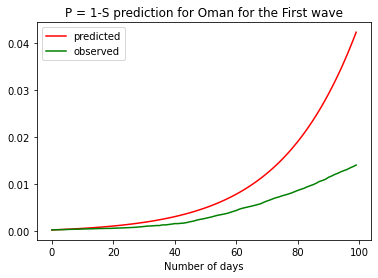

In [10]:
r = 0.043799
from scipy.integrate import odeint

#Total population n
n = pop_o
#Initial number of infected and recovered individuals, i_0 and r_0
i_0 = oman["Cumulative_cases_norm"][0]
r_0 = 0
# beginning of the period s_0
s_0 = 1 - i_0 - r_0
# Assuming that people tend to recover within 10 days
b = 0.1
a = r + b
t = np.linspace(0, 100, 100)
y0 = s_0, i_0, r_0
ret = odeint(deriv, y0, t, args=(a, b))
S, I, R = ret.T

s = pd.DataFrame()
s["s"] = S
s["pred"] = 1 - s["s"]
s["pred"].plot(c = 'red', label = 'predicted')
oman['Cumulative_cases_norm'][:100].plot(c = 'green', label = 'observed')
plt.title("P = 1-S prediction for Oman for the First wave")
plt.xlabel("Number of days")
plt.legend()
plt.show()

# OMAN (exp first wave)

**log P = c + rt -------------------1**

The first exponential of the exponential of the First wave of Oman is 0-36 (in days).

Now from the graphs in the previous codes, we know that

c = -8.63267

t = 36

log(P) = -6.68676 (from the log return graph at t = 36)

From 1,

-6.68676 = -8.63267 + 36.r

r = (-6.68676 + 8.63267)/36

r = 0.054053

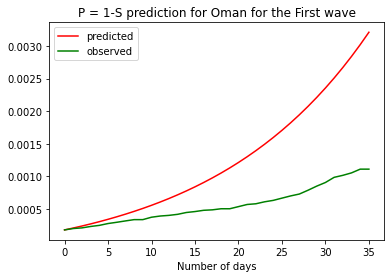

In [11]:
r = 0.054053
from scipy.integrate import odeint

#Total population n
n = pop_o
#Initial number of infected and recovered individuals, i_0 and r_0
i_0 = oman["Cumulative_cases_norm"][0]
r_0 = 0
# beginning of the period s_0
s_0 = 1 - i_0 - r_0
# Assuming that people tend to recover within 10 days
b = 0.1
a = r + b
t = np.linspace(0, 36, 36)
y0 = s_0, i_0, r_0
ret = odeint(deriv, y0, t, args=(a, b))
S, I, R = ret.T

s = pd.DataFrame()
s["s"] = S
s["pred"] = 1 - s["s"]
s["pred"].plot(c = 'red', label = 'predicted')
oman['Cumulative_cases_norm'][:36].plot(c = 'green', label = 'observed')
plt.title("P = 1-S prediction for Oman for the First wave")
plt.xlabel("Number of days")
plt.legend()
plt.show()

# OMAN (logistic first wave)

**log P = c + rt -------------------1**

The first logistic of the exponential of the First wave of Kuwait is 48-100 (in days).

Now from the graphs in the previous codes, we know that

c = -6.035048

t = 52

log(P) = -4.252769 (from the log return graph at t = 30 and c = -6.328433)

From 1,

-4.252769 = -6.035048 + 52.r

r = (-4.252769 + 6.035048)/52

r = 0.017822

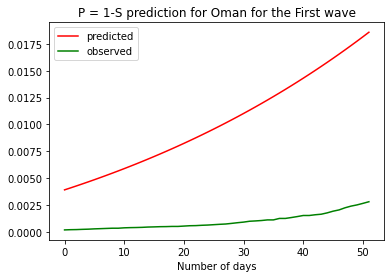

In [12]:
r = 0.017822
from scipy.integrate import odeint

#Total population n
n = pop_o
#Initial number of infected and recovered individuals, i_0 and r_0
r_0 = oman["Cumulative_cases_norm"][48]
i_0 = oman["Cumulative_cases_norm"][58] - r_0
#beginning of the period s_0
s_0 = 1 - i_0 - r_0
#Assuming that people tend to recover within 10 days
b = 0.1
a = r + b
t = np.linspace(0, 52, 52)
y0 = s_0, i_0, r_0
ret = odeint(deriv, y0, t, args=(a, b))
S, I, R = ret.T

s = pd.DataFrame()
s["s"] = S
s["pred"] = 1 - s["s"]
s["pred"].plot(c = 'red', label = 'predicted')
oman['Cumulative_cases_norm'][:52].plot(c = 'green', label = 'observed')
plt.title("P = 1-S prediction for Oman for the First wave")
plt.xlabel("Number of days")
plt.legend()
plt.show()